In [1]:
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2, style="white")
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
gpu = pd.read_csv('../data/gpu_prices.csv')
gpu['timestamp'] = pd.to_datetime(gpu['timestamp'], unit='ms')

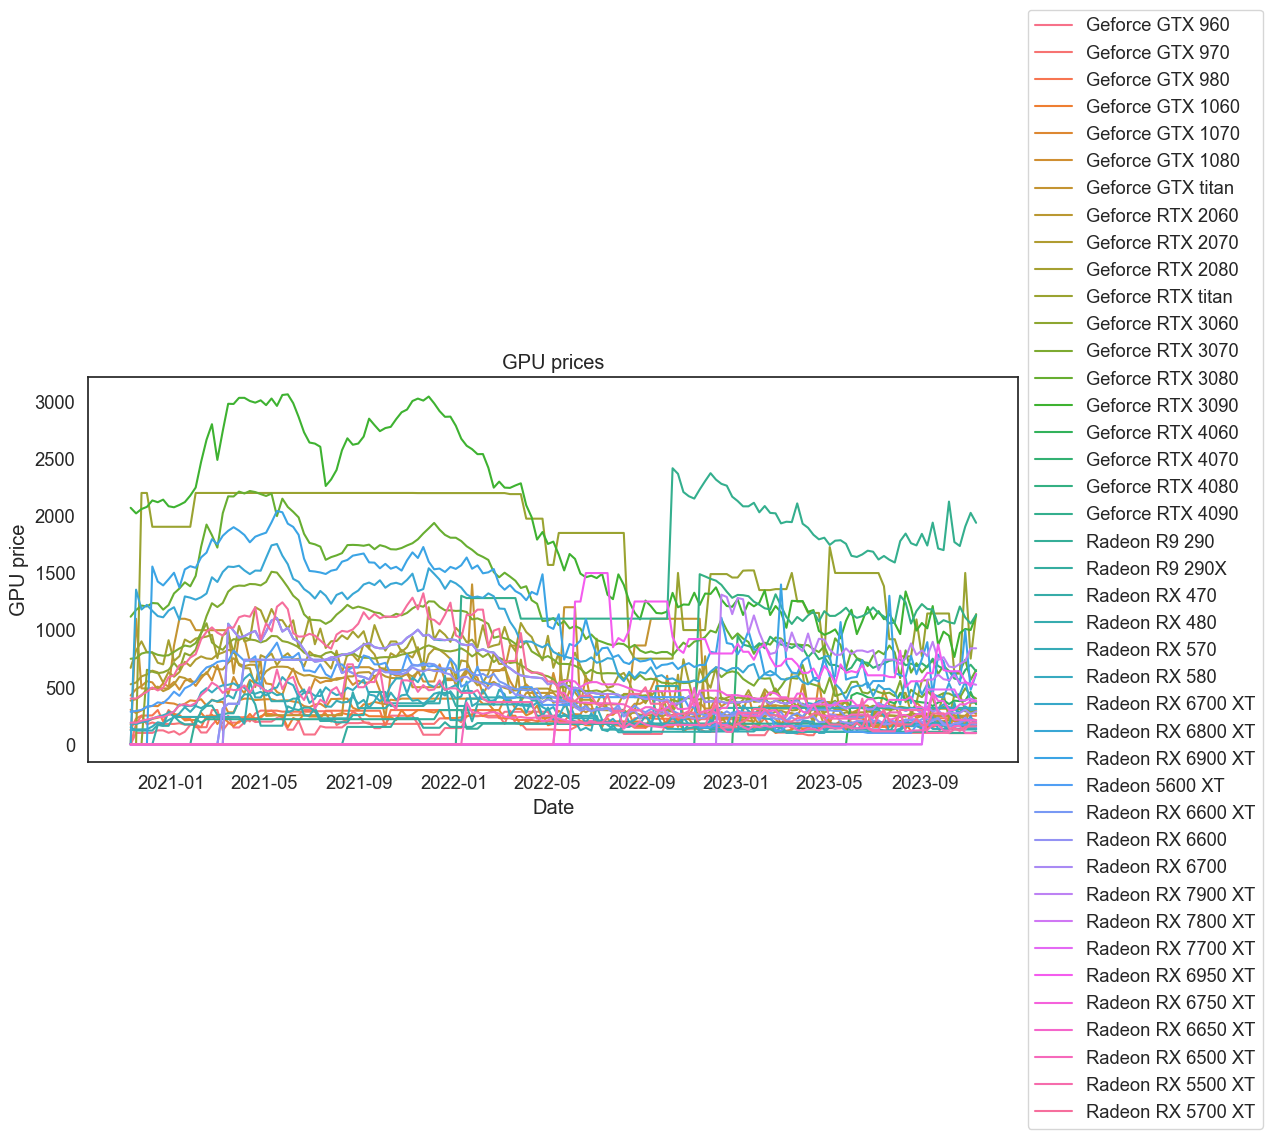

In [3]:
sns.lineplot(data=gpu, x='timestamp', y='price', hue='model')
plt.title('GPU prices')
plt.xlabel('Date')
plt.ylabel('GPU price')
plt.legend(title='GPU models')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.cgdirector.com/gpu-msrp-list/"

response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'id': 'tablepress-172'})

    rows = []
    for row in table.find_all('tr'):
        cols = row.find_all(['td', 'th'])
        cols = [col.text.strip() for col in cols]
        rows.append(cols)

    gpu_msrp = pd.DataFrame(rows[:-1][1:], columns=rows[0])

else:
    print("Failed to retrieve webpage.")

In [5]:
print(gpu_msrp['Graphics Card'].unique())
print(gpu['model'].unique())

['Nvidia RTX 3090 Ti' 'Nvidia RTX 4090' 'Nvidia RTX 3090'
 'Nvidia RTX 4080' 'Nvidia RTX 3080 Ti' 'AMD Radeon RX 6950 XT'
 'AMD Radeon RX 7900 XTX' 'AMD Radeon RX 6900 XT' 'Nvidia RTX 2080 Ti'
 'AMD Radeon RX 7900 XT' 'Nvidia RTX 3080 (12GB)' 'AMD Radeon VII'
 'Nvidia RTX 2080' 'Nvidia RTX 2080 SUPER' 'Nvidia RTX 3080 (10GB)'
 'AMD Radeon RX 6800 XT' 'Nvidia GTX 980 Ti' 'Nvidia GTX 1080'
 'Nvidia RTX 3070 Ti' 'AMD Radeon RX 6800' 'AMD Radeon RX 6750 XT'
 'Nvidia GTX 980' 'AMD Radeon RX Vega 64' 'Nvidia RTX 2070'
 'Nvidia RTX 2070 SUPER' 'Nvidia RTX 3070' 'AMD Radeon RX 6700 XT'
 'Nvidia GTX 1070 Ti' 'AMD Radeon RX 6700' 'AMD Radeon RX 5700 XT'
 'AMD Radeon RX 6650 XT' 'AMD Radeon RX Vega 56' 'Nvidia GTX 1080 Ti'
 'Nvidia RTX 2060 SUPER' 'Nvidia RTX 3060 Ti' 'AMD Radeon RX 6600 XT'
 'Nvidia GTX 1070' 'AMD Radeon RX 5700' 'Nvidia RTX 2060'
 'AMD Radeon RX 6600' 'Nvidia RTX 3060' 'AMD Radeon RX 5600 XT'
 'Nvidia GTX 1660 Ti' 'Nvidia GTX 1060' 'Nvidia RTX 3050'
 'Nvidia GTX 1660 SUPER' 'Nv

In [6]:
df1 = gpu.copy()
df2 = gpu_msrp.copy()
df1['model'] = df1['model'].str.lower()
df2['Graphics Card'] = df2['Graphics Card'].str.lower()

In [7]:
#data cleaning
df1['model'] = [item.replace('geforce ', '') for item in df1['model']]

df2['Graphics Card'] = [item.replace('nvidia ', '') for item in df2['Graphics Card']]
df2['Graphics Card'] = [item.replace('amd ', '') for item in df2['Graphics Card']]
df2['Graphics Card'] = [item.replace(' (10gb)', '') for item in df2['Graphics Card']]
df2['Graphics Card'] = [item.replace(' (8gb)', '') for item in df2['Graphics Card']]
df2['Graphics Card'] = np.where(df2['Graphics Card'].str.contains('ti'), np.nan, df2['Graphics Card'])
df2['Graphics Card'] = np.where(df2['Graphics Card'].str.contains('super'), np.nan, df2['Graphics Card'])
df2['Graphics Card'] = np.where(df2['Graphics Card'].str.contains('4gb'), np.nan, df2['Graphics Card'])
df2['Graphics Card'] = np.where(df2['Graphics Card'].str.contains('12gb'), np.nan, df2['Graphics Card'])
df2 = df2.dropna()
print(df1['model'].unique())
print(df2['Graphics Card'].unique())

['gtx 960' 'gtx 970' 'gtx 980' 'gtx 1060' 'gtx 1070' 'gtx 1080'
 'gtx titan' 'rtx 2060' 'rtx 2070' 'rtx 2080' 'rtx titan' 'rtx 3060'
 'rtx 3070' 'rtx 3080' 'rtx 3090' 'rtx 4060' 'rtx 4070' 'rtx 4080'
 'rtx 4090' 'radeon r9 290' 'radeon r9 290x' 'radeon rx 470'
 'radeon rx 480' 'radeon rx 570' 'radeon rx 580' 'radeon rx 6700 xt'
 'radeon rx 6800 xt' 'radeon rx 6900 xt' 'radeon 5600 xt'
 'radeon rx 6600 xt' 'radeon rx 6600' 'radeon rx 6700' 'radeon rx 7900 xt'
 'radeon rx 7800 xt' 'radeon rx 7700 xt' 'radeon rx 6950 xt'
 'radeon rx 6750 xt' 'radeon rx 6650 xt' 'radeon rx 6500 xt'
 'radeon rx 5500 xt' 'radeon rx 5700 xt']
['rtx 4090' 'rtx 3090' 'rtx 4080' 'radeon rx 6950 xt' 'radeon rx 7900 xtx'
 'radeon rx 6900 xt' 'radeon rx 7900 xt' 'radeon vii' 'rtx 2080'
 'rtx 3080' 'radeon rx 6800 xt' 'gtx 1080' 'radeon rx 6800'
 'radeon rx 6750 xt' 'gtx 980' 'radeon rx vega 64' 'rtx 2070' 'rtx 3070'
 'radeon rx 6700 xt' 'radeon rx 6700' 'radeon rx 5700 xt'
 'radeon rx 6650 xt' 'radeon rx vega 56' '

In [8]:
df3 = df1[df1['model'].isin(df2['Graphics Card'])]
df3['model'].isin(df2['Graphics Card'])

0       True
1       True
2       True
3       True
4       True
        ... 
6432    True
6433    True
6434    True
6435    True
6436    True
Name: model, Length: 4239, dtype: bool

In [9]:
df3 = df3.copy()
df3['msrp'] = np.nan

for index, row in df3.iterrows():
    model = row['model']
    specific_msrp = df2.loc[df2['Graphics Card'] == model, 'Launch MSRP (US$)'].values[0]
    df3.at[index, 'msrp'] = pd.to_numeric(specific_msrp, errors='coerce')
    
df3['msrp'] = pd.to_numeric(df3['msrp'], errors='coerce')

Text(0.5, 1.0, 'MSRP of GPUs')

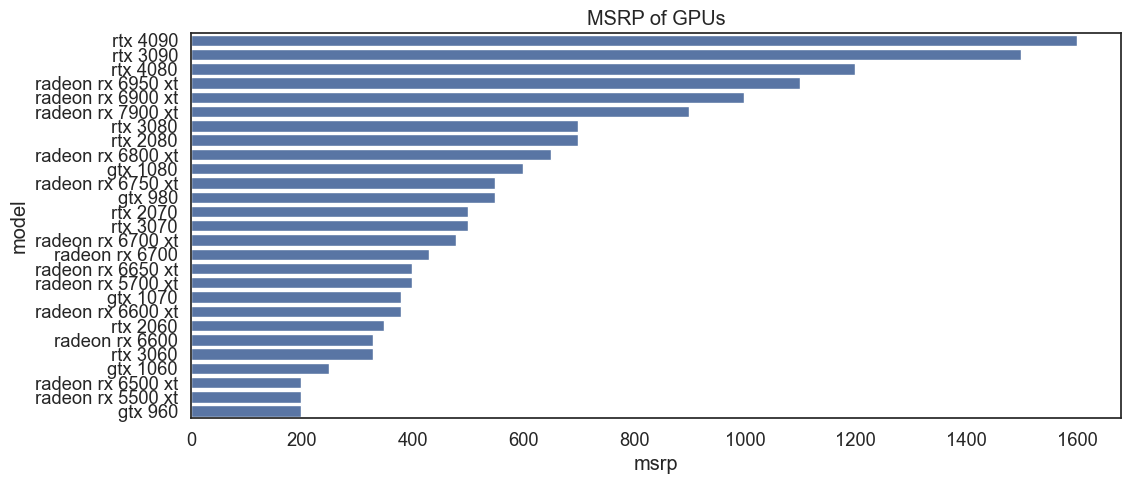

In [10]:
df4 = df3.groupby('model')['msrp'].mean()
df4 = pd.DataFrame(df4).sort_values(by='msrp', ascending=False)
sns.barplot(data=df4, x='msrp', y='model', orient='y')
plt.title('MSRP of GPUs')

In [11]:
df3['gpu_price_over_msrp'] = df3['price']/df3['msrp']

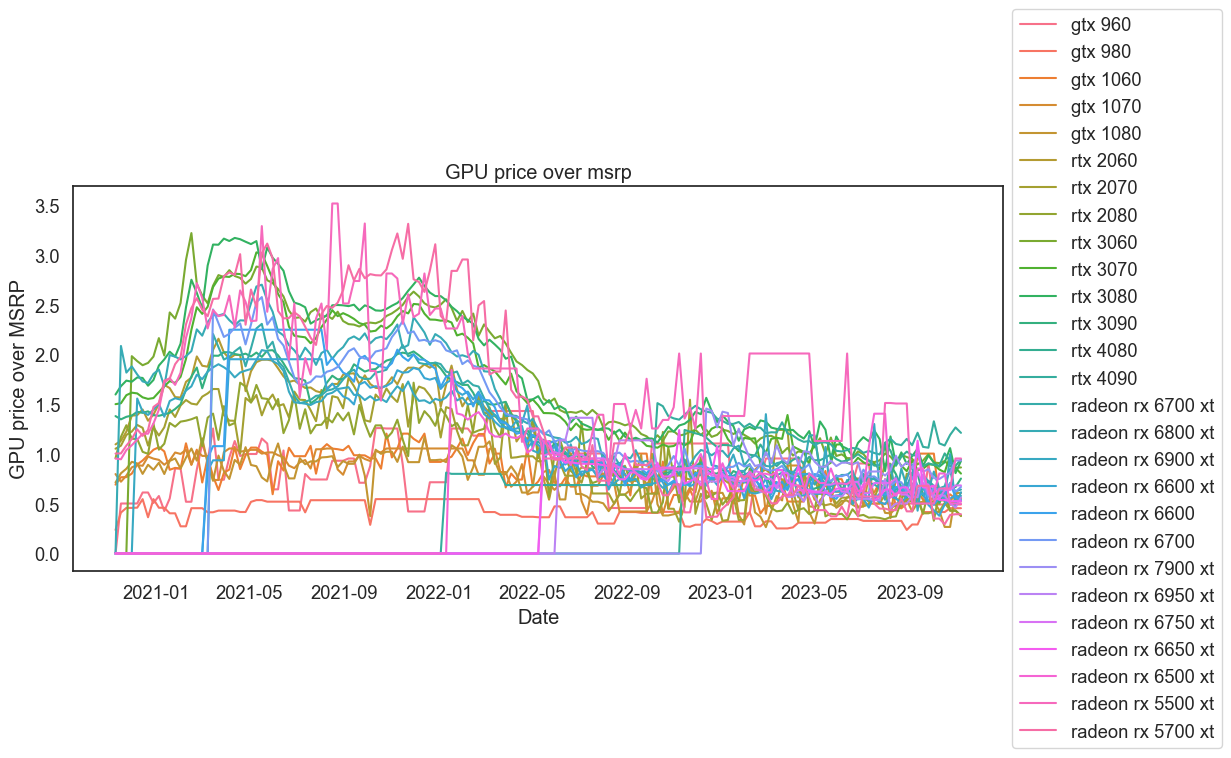

In [12]:
sns.lineplot(data=df3, x='timestamp', y='gpu_price_over_msrp', hue='model')
plt.title('GPU price over msrp')
plt.xlabel('Date')
plt.ylabel('GPU price over MSRP')
plt.legend(title='GPU models')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))